In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew


In [16]:
df = pd.read_csv("stock_data_aug_2025.csv")

df.head()


,Date,Ticker,Open Price,Close Price,High Price,Low Price,Volume Traded,Market Cap,PE Ratio,Dividend Yield,EPS,52 Week High,52 Week Low,Sector
0,2025-07-01,AAPL,209.02,206.68,210.48,205.01,53813618,3.226224e+12,27.38,0.52,7.55,231.45,173.54,Technology
1,2025-07-01,ABBV,187.01,189.97,191.84,186.30,14831744,3.226888e+11,14.09,3.48,13.48,255.99,158.77,Healthcare
2,2025-07-01,ABT,115.83,113.90,117.36,112.75,18439336,1.898333e+11,24.09,1.70,4.73,131.38,83.47,Healthcare
3,2025-07-01,ADBE,598.97,597.43,604.53,594.05,32093085,2.588863e+11,41.74,0.00,14.31,802.91,422.60,Technology
4,2025-07-01,ADP,248.69,248.51,249.30,247.11,3084969,1.023276e+11,31.30,2.22,7.94,274.26,228.28,Financials


In [17]:
print(df.shape)

(2542, 14)


In [18]:
for col in df.columns:
    duplicate_count = df[col].duplicated().sum()
    print(f"Number of duplicate values in '{col}': {duplicate_count}")

Number of duplicate values in 'Date': 2511
Number of duplicate values in 'Ticker': 2460
Number of duplicate values in 'Open Price': 76
Number of duplicate values in 'Close Price': 76
Number of duplicate values in 'High Price': 79
Number of duplicate values in 'Low Price': 85
Number of duplicate values in 'Volume Traded': 2
Number of duplicate values in 'Market Cap': 24
Number of duplicate values in 'PE Ratio': 756
Number of duplicate values in 'Dividend Yield': 2061
Number of duplicate values in 'EPS': 1037
Number of duplicate values in '52 Week High': 47
Number of duplicate values in '52 Week Low': 68
Number of duplicate values in 'Sector': 2532


In [19]:
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"Number of unique values in '{col}': {unique_count}")

Number of unique values in 'Date': 31
Number of unique values in 'Ticker': 82
Number of unique values in 'Open Price': 2466
Number of unique values in 'Close Price': 2466
Number of unique values in 'High Price': 2463
Number of unique values in 'Low Price': 2457
Number of unique values in 'Volume Traded': 2540
Number of unique values in 'Market Cap': 2518
Number of unique values in 'PE Ratio': 1786
Number of unique values in 'Dividend Yield': 481
Number of unique values in 'EPS': 1505
Number of unique values in '52 Week High': 2495
Number of unique values in '52 Week Low': 2474
Number of unique values in 'Sector': 10


In [20]:
print("Null values in each column:")
print(df.isnull().sum())




Null values in each column:
Date              0
Ticker            0
Open Price        0
Close Price       0
High Price        0
Low Price         0
Volume Traded     0
Market Cap        0
PE Ratio          0
Dividend Yield    0
EPS               0
52 Week High      0
52 Week Low       0
Sector            0
dtype: int64


In [21]:
df = df.drop_duplicates()
print("After removing duplicates, shape:", df.shape)

After removing duplicates, shape: (2542, 14)


In [22]:
print("\nData types:\n", df.dtypes)
print("\nSummary statistics:\n", df.describe())




Data types:
 Date               object
Ticker             object
Open Price        float64
Close Price       float64
High Price        float64
Low Price         float64
Volume Traded       int64
Market Cap        float64
PE Ratio          float64
Dividend Yield    float64
EPS               float64
52 Week High      float64
52 Week Low       float64
Sector             object
dtype: object

Summary statistics:
         Open Price  Close Price   High Price    Low Price  Volume Traded  \
count  2542.000000  2542.000000  2542.000000  2542.000000   2.542000e+03   
mean    337.964437   337.992722   343.169323   332.775968   1.664560e+07   
std     473.089811   472.954956   480.115125   465.790691   1.548815e+07   
min      19.090000    18.690000    19.170000    18.550000   2.005507e+06   
25%     111.297500   111.202500   113.037500   109.702500   7.477790e+06   
50%     196.215000   194.930000   199.035000   192.630000   1.178796e+07   
75%     449.965000   451.497500   457.730000   444.115

Open Price: Skewness Before = 4.98
Close Price: Skewness Before = 4.97
High Price: Skewness Before = 4.97
Low Price: Skewness Before = 4.98
Volume Traded: Skewness Before = 2.43
Market Cap: Skewness Before = 3.29
PE Ratio: Skewness Before = 1.85
Dividend Yield: Skewness Before = 0.96
EPS: Skewness Before = 5.79
52 Week High: Skewness Before = 4.98
52 Week Low: Skewness Before = 5.15


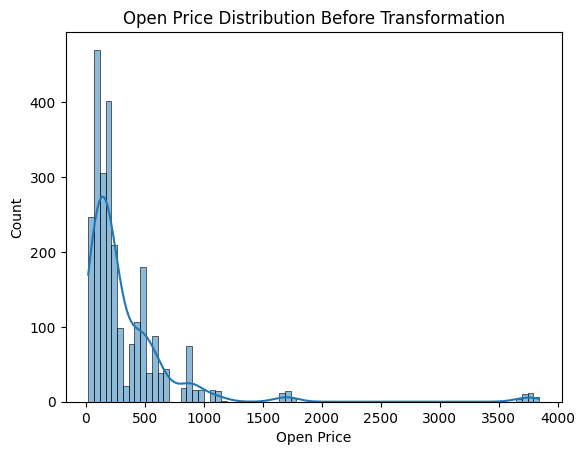

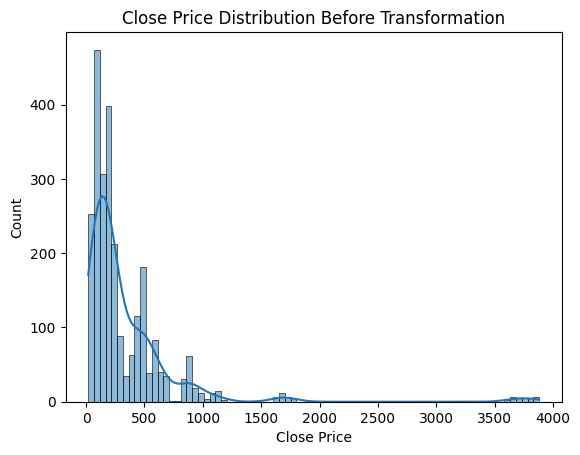

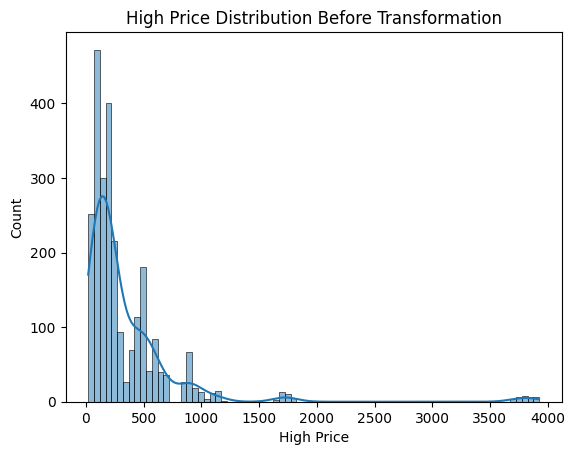

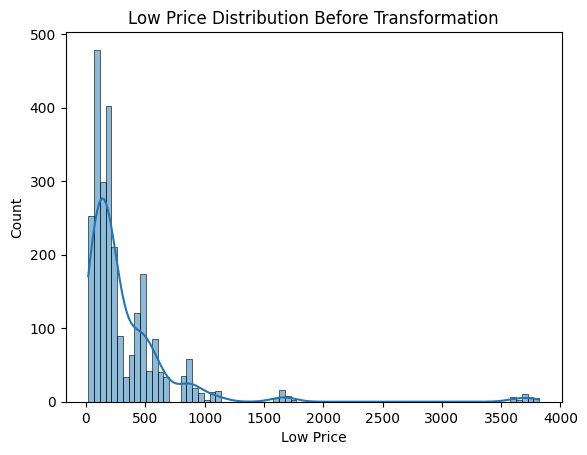

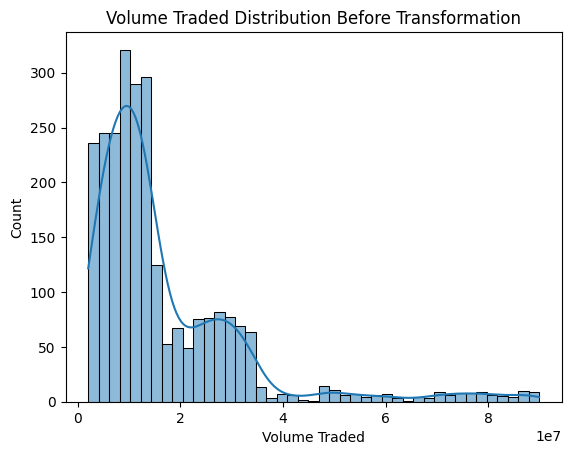

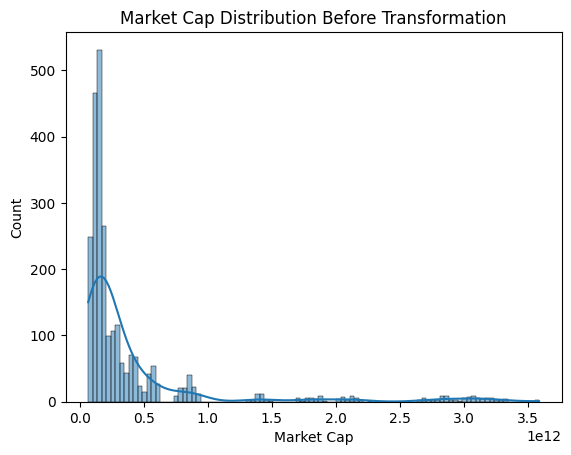

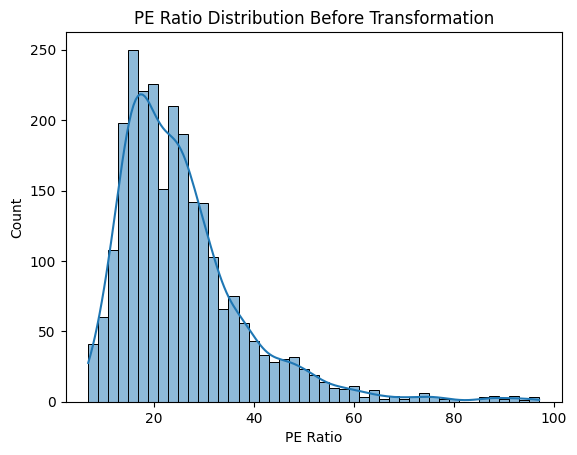

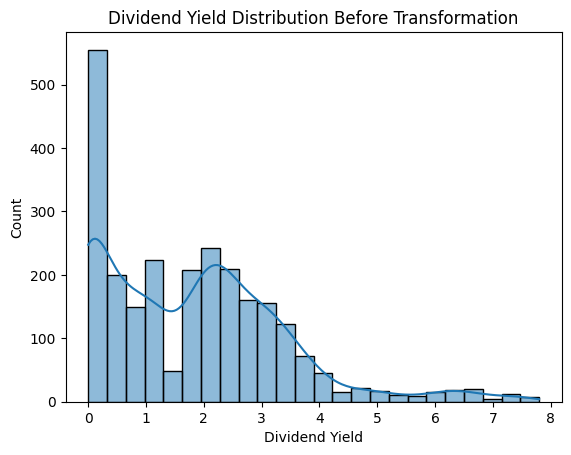

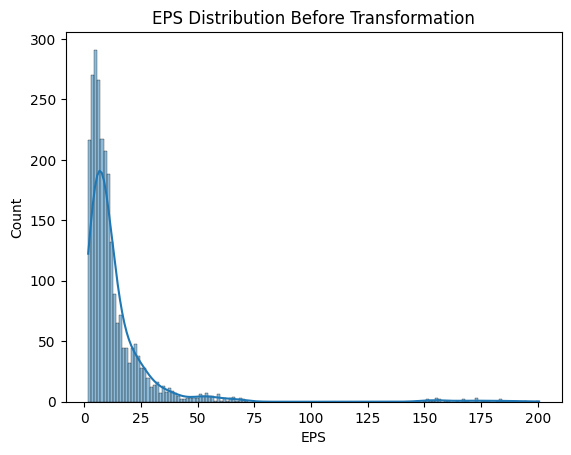

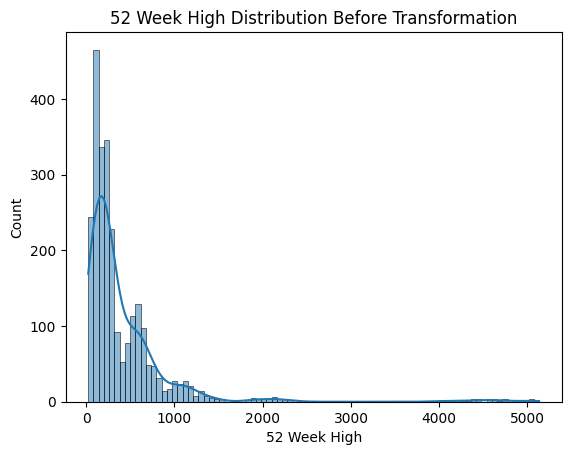

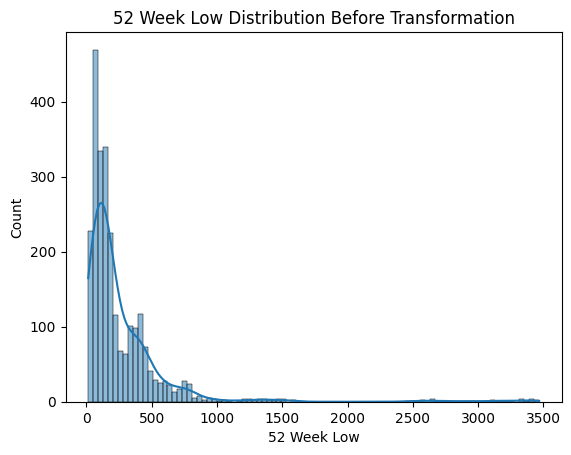

In [23]:
original_df = pd.read_csv("stock_data_aug_2025.csv")
numeric_cols_original = original_df.select_dtypes(include=['int64', 'float64']).columns

skewness_before = {}
for col in numeric_cols_original:
    value = skew(original_df[col])
    skewness_before[col] = value
    print(f"{col}: Skewness Before = {value:.2f}")

for col in numeric_cols_original:
    plt.figure()
    sns.histplot(original_df[col], kde=True)
    plt.title(f"{col} Distribution Before Transformation")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()



In [26]:
from scipy.stats import boxcox, skew
import numpy as np


skewness_after = {}
for col in numeric_cols_original:
    transformed_data, fitted_lambda = boxcox(original_df[col] + 1) # Add 1 to handle zero values
    value = skew(transformed_data)
    skewness_after[col] = value
    print(f"{col}: Skewness After Box-Cox = {value:.2f}")


Open Price: Skewness After Box-Cox = 0.00
Close Price: Skewness After Box-Cox = 0.00
High Price: Skewness After Box-Cox = 0.00
Low Price: Skewness After Box-Cox = 0.00
Volume Traded: Skewness After Box-Cox = 0.00
Market Cap: Skewness After Box-Cox = 0.17
PE Ratio: Skewness After Box-Cox = 0.00
Dividend Yield: Skewness After Box-Cox = -0.03
EPS: Skewness After Box-Cox = 0.04
52 Week High: Skewness After Box-Cox = 0.00
52 Week Low: Skewness After Box-Cox = 0.00


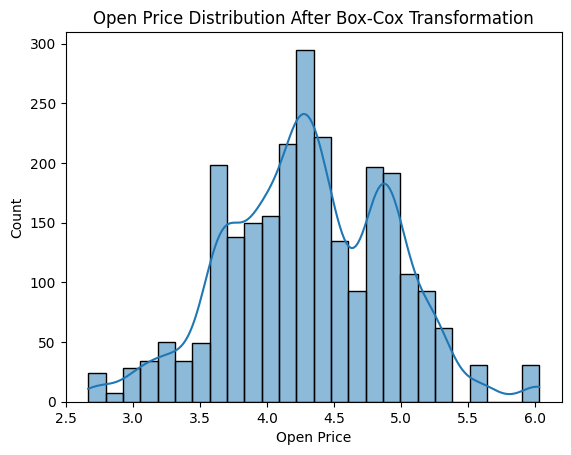

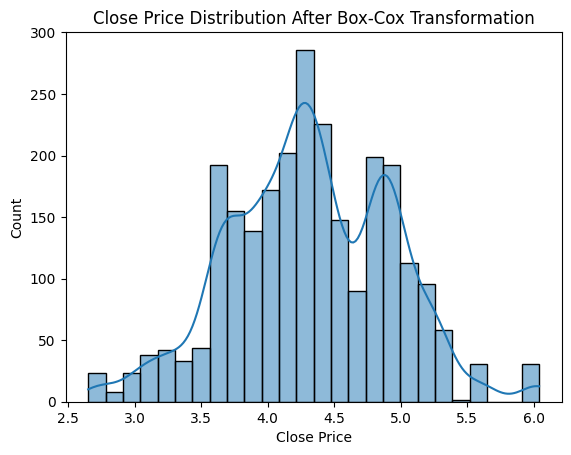

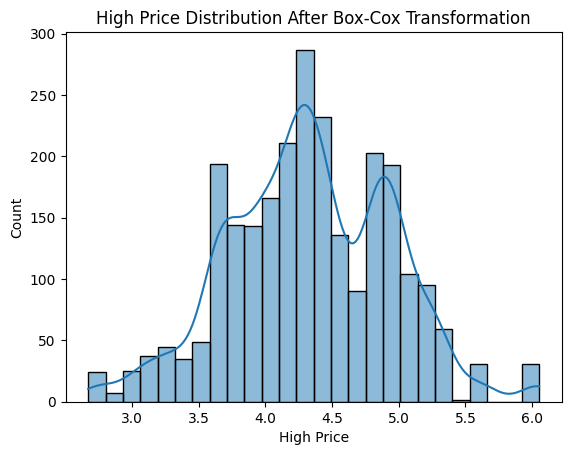

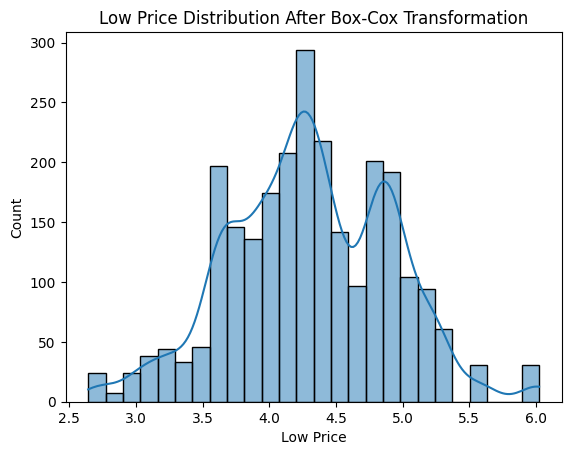

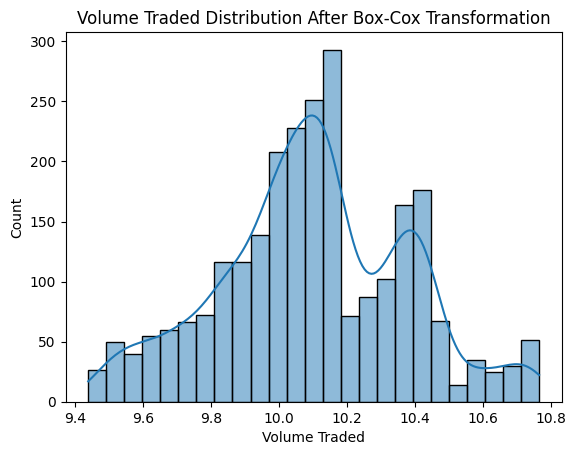

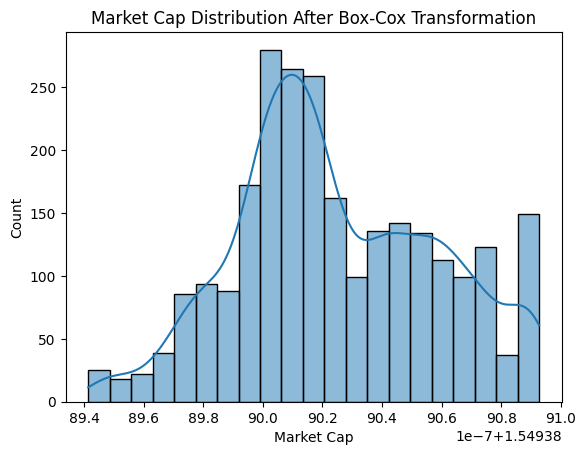

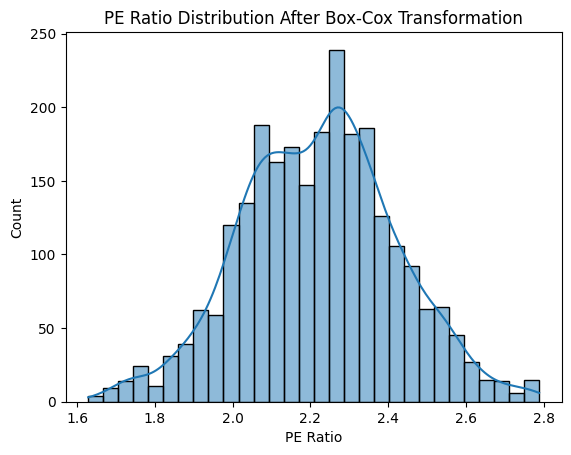

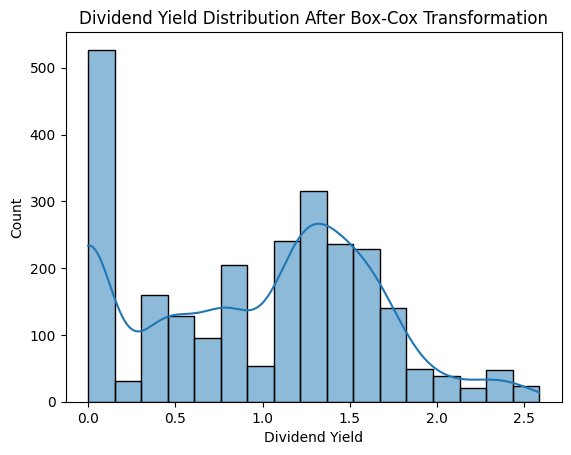

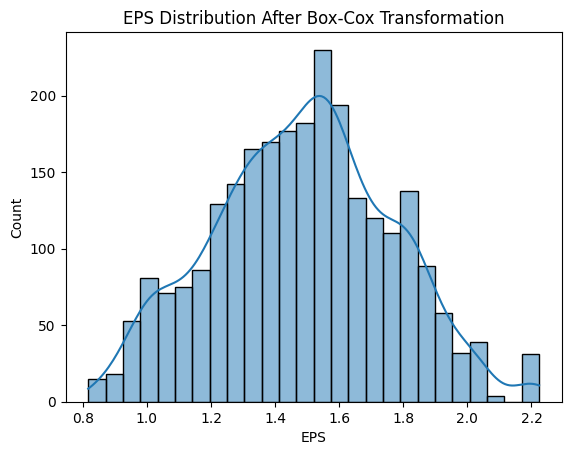

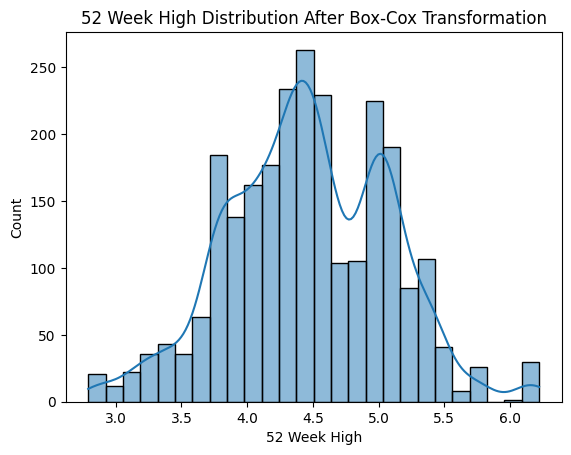

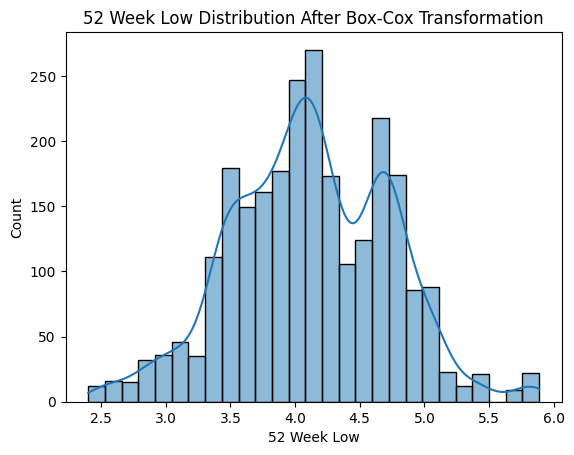

In [ ]:


skewness_after = {}
for col in numeric_cols_original:
    transformed_data, fitted_lambda = boxcox(original_df[col] + 1) # Add 1 to handle zero values
    value = skew(transformed_data)
    skewness_after[col] = value


    plt.figure()
    sns.histplot(transformed_data, kde=True)
    plt.title(f"{col} Distribution After Box-Cox Transformation")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

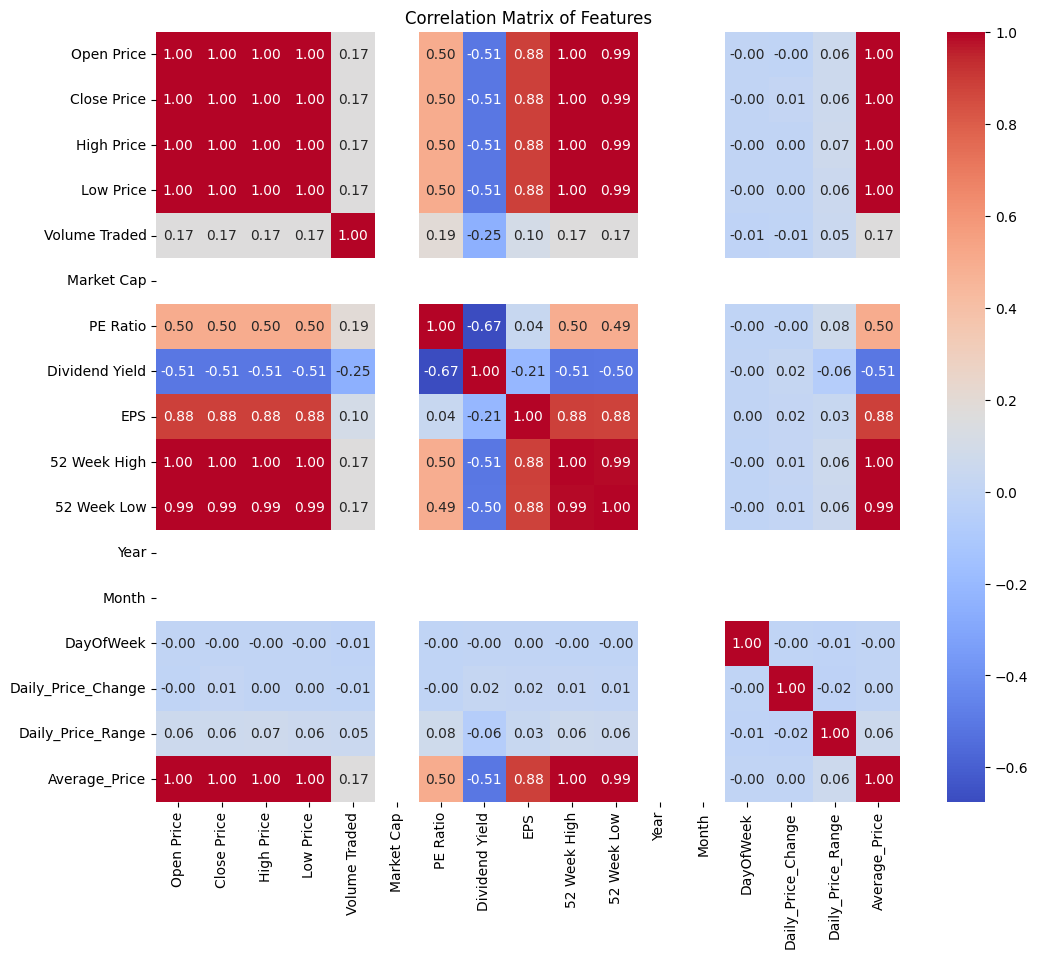

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for normalization
numeric_cols_cleaned = df_cleaned.select_dtypes(include=['int64','float64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the numerical columns
df_cleaned[numeric_cols_cleaned] = scaler.fit_transform(df_cleaned[numeric_cols_cleaned])

print("DataFrame after normalization:")
display(df_cleaned.head())


DataFrame after normalization:


,Date,Ticker,Open Price,Close Price,High Price,Low Price,Volume Traded,Market Cap,PE Ratio,Dividend Yield,EPS,52 Week High,52 Week Low,Sector,Year,Month,DayOfWeek,Daily_Price_Change,Daily_Price_Range,Average_Price
0,2025-07-01,AAPL,0.061807,0.049086,0.052551,0.057120,1.871034,0.0,0.427926,-0.634837,-0.153804,-0.038822,0.122404,Technology,0.0,0.0,-0.981753,-0.712319,-0.414632,0.055142
1,2025-07-01,ABBV,-0.063308,-0.045712,-0.051703,-0.050534,0.242764,0.0,-1.106154,0.993197,0.604917,0.073825,0.022616,Healthcare,0.0,0.0,-0.981753,0.985287,-0.110202,-0.052816
2,2025-07-01,ABT,-0.601001,-0.619881,-0.603235,-0.614403,0.517836,0.0,0.128676,0.194185,-0.795047,-0.670732,-0.696675,Healthcare,0.0,0.0,-0.981753,-1.057425,0.983877,-0.609646
3,2025-07-01,ADBE,1.248090,1.245119,1.241164,1.256434,1.217978,0.0,1.422350,-1.660725,0.680622,1.353867,1.123048,Technology,0.0,0.0,-0.981753,-0.165916,-1.319290,1.247736
4,2025-07-01,ADP,0.257341,0.256466,0.242971,0.267363,-1.741129,0.0,0.742155,0.458978,-0.086191,0.150910,0.430271,Financials,0.0,0.0,-0.981753,-0.048909,-2.216048,0.256041


OUTLIER

In [ ]:

numeric_cols = df.select_dtypes(include=np.number).columns

#  IQR
def remove_outliers_iqr(df, column, whisker_width=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - whisker_width * IQR
    upper_bound = Q3 + whisker_width * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Apply outlier removal to each numerical column
df_cleaned = df.copy()
initial_shape = df_cleaned.shape

for col in numeric_cols:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

print(f"Original shape: {initial_shape}")
print(f"Shape after outlier removal: {df_cleaned.shape}")

Original shape: (2542, 20)
Shape after outlier removal: (2476, 20)


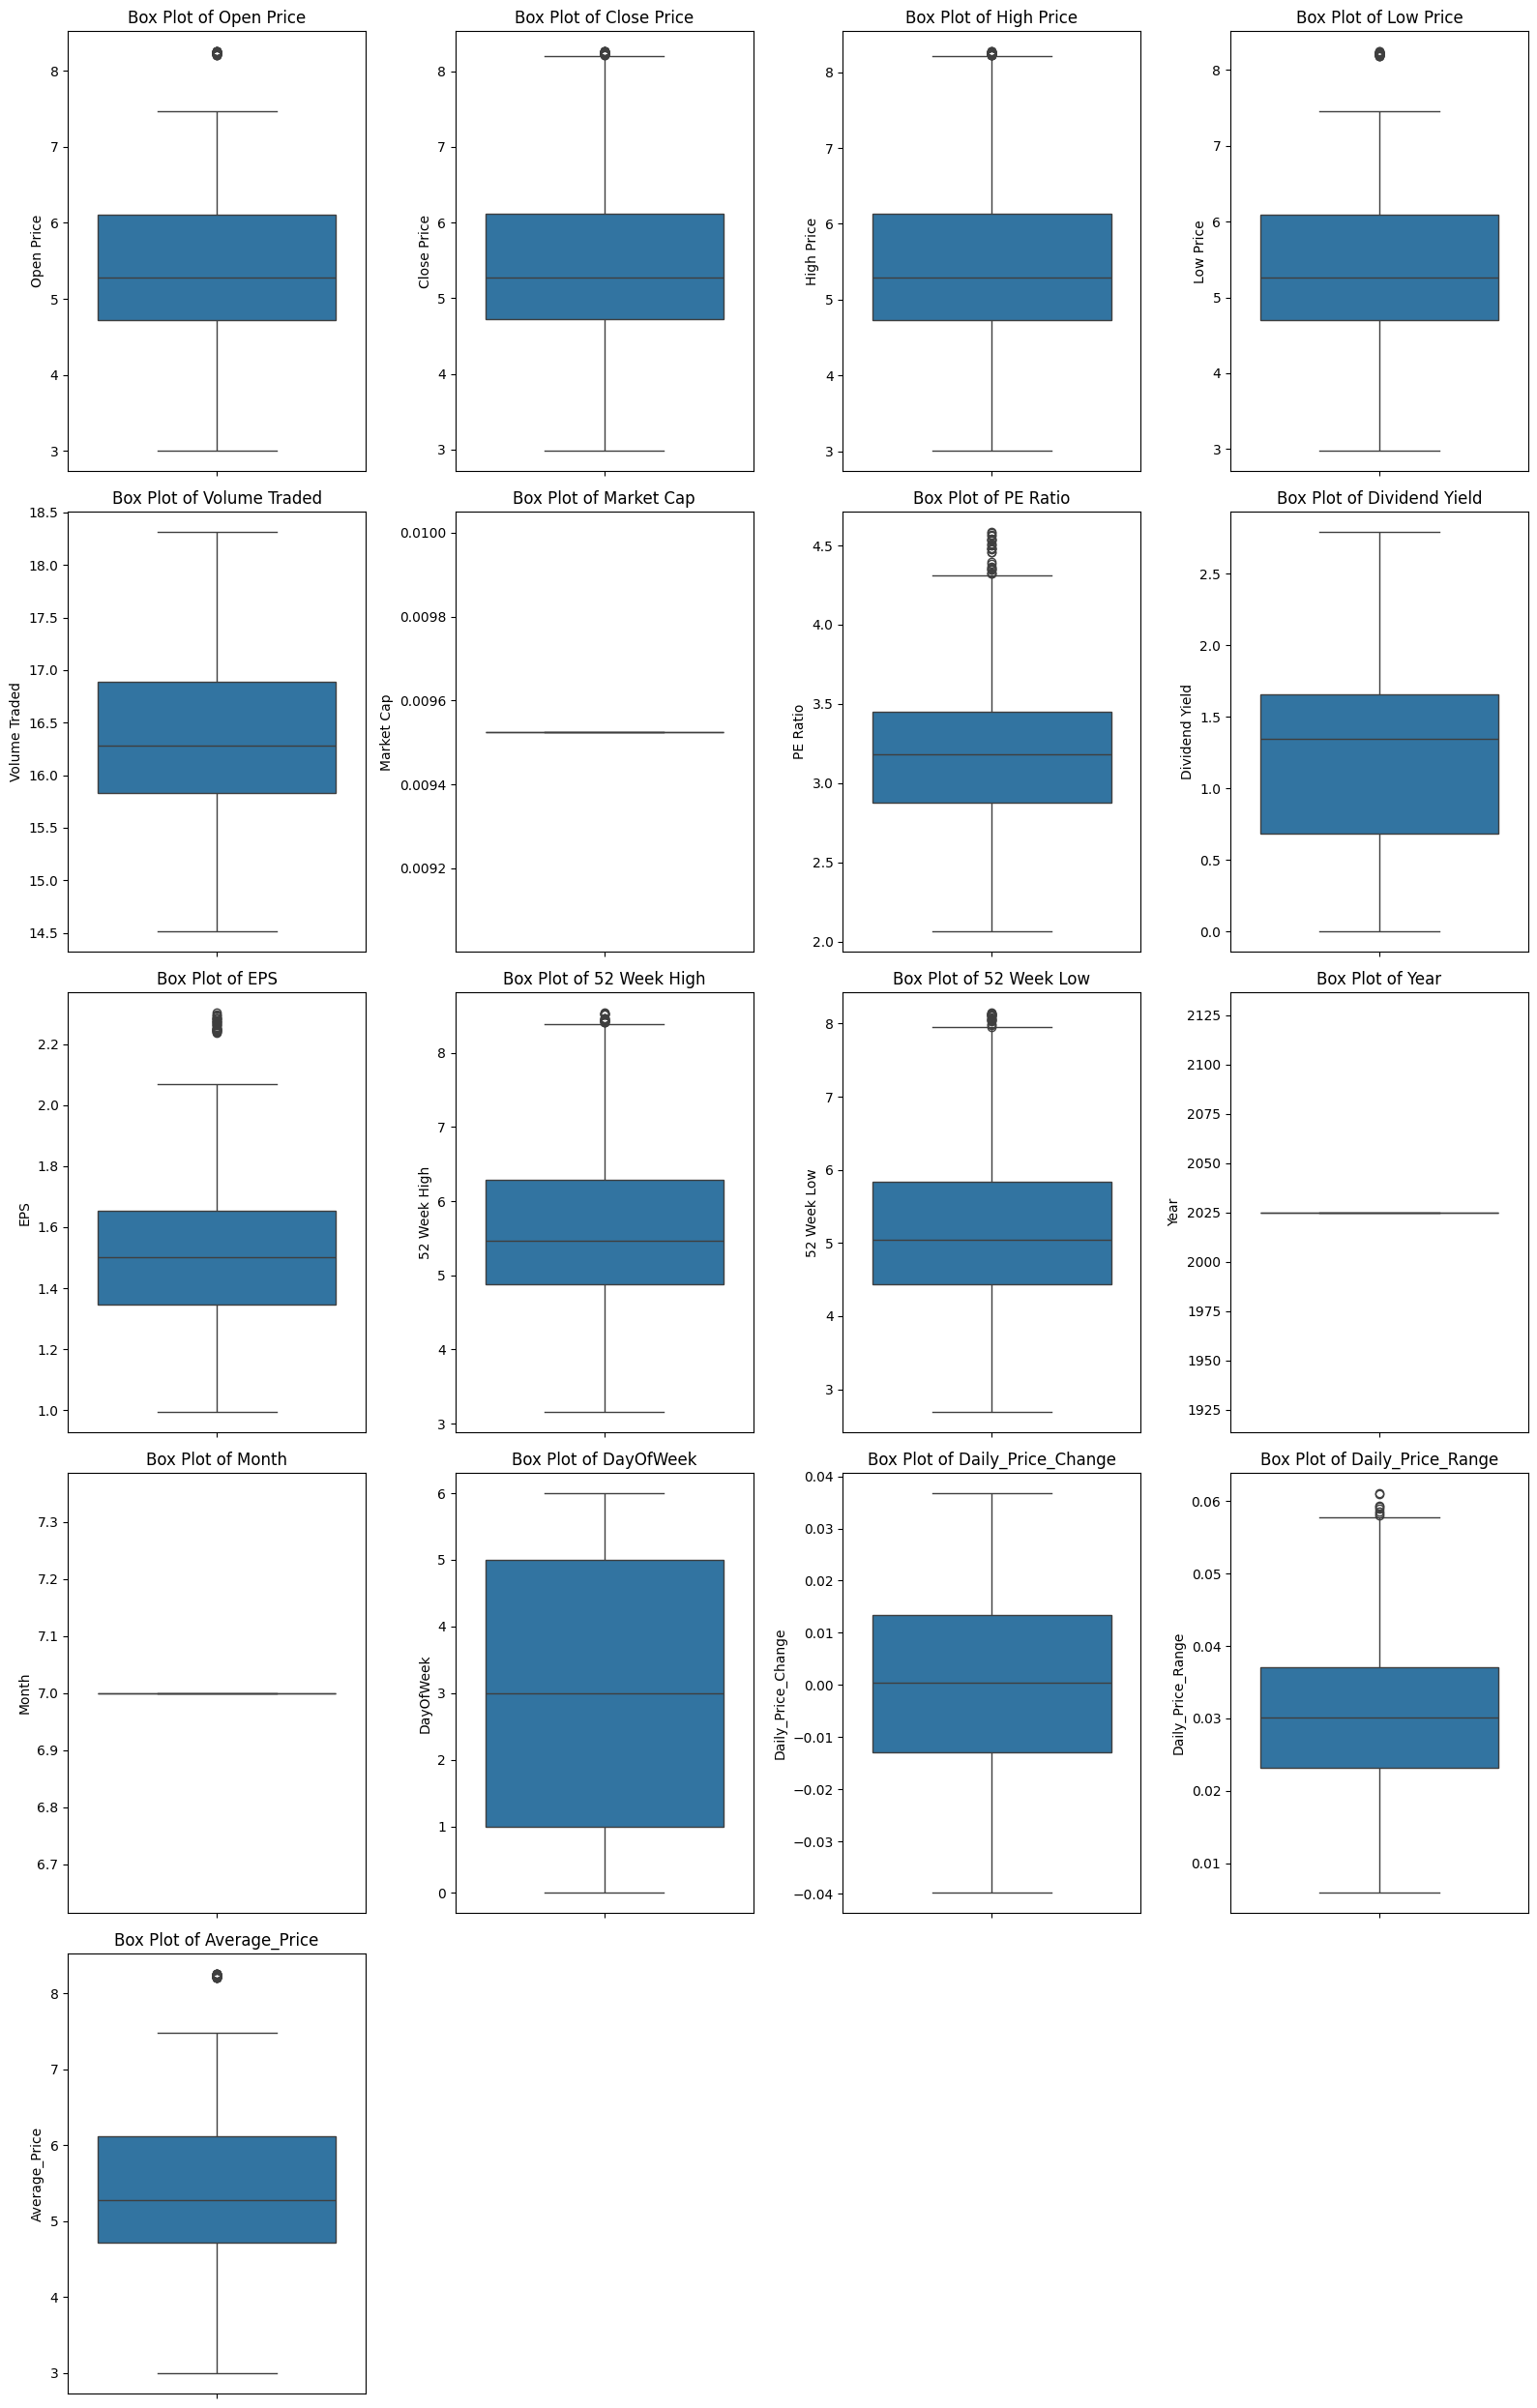

In [ ]:

numeric_cols = df.select_dtypes(include=np.number).columns


n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(16, n_rows * 5))

# Plot boxplots
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

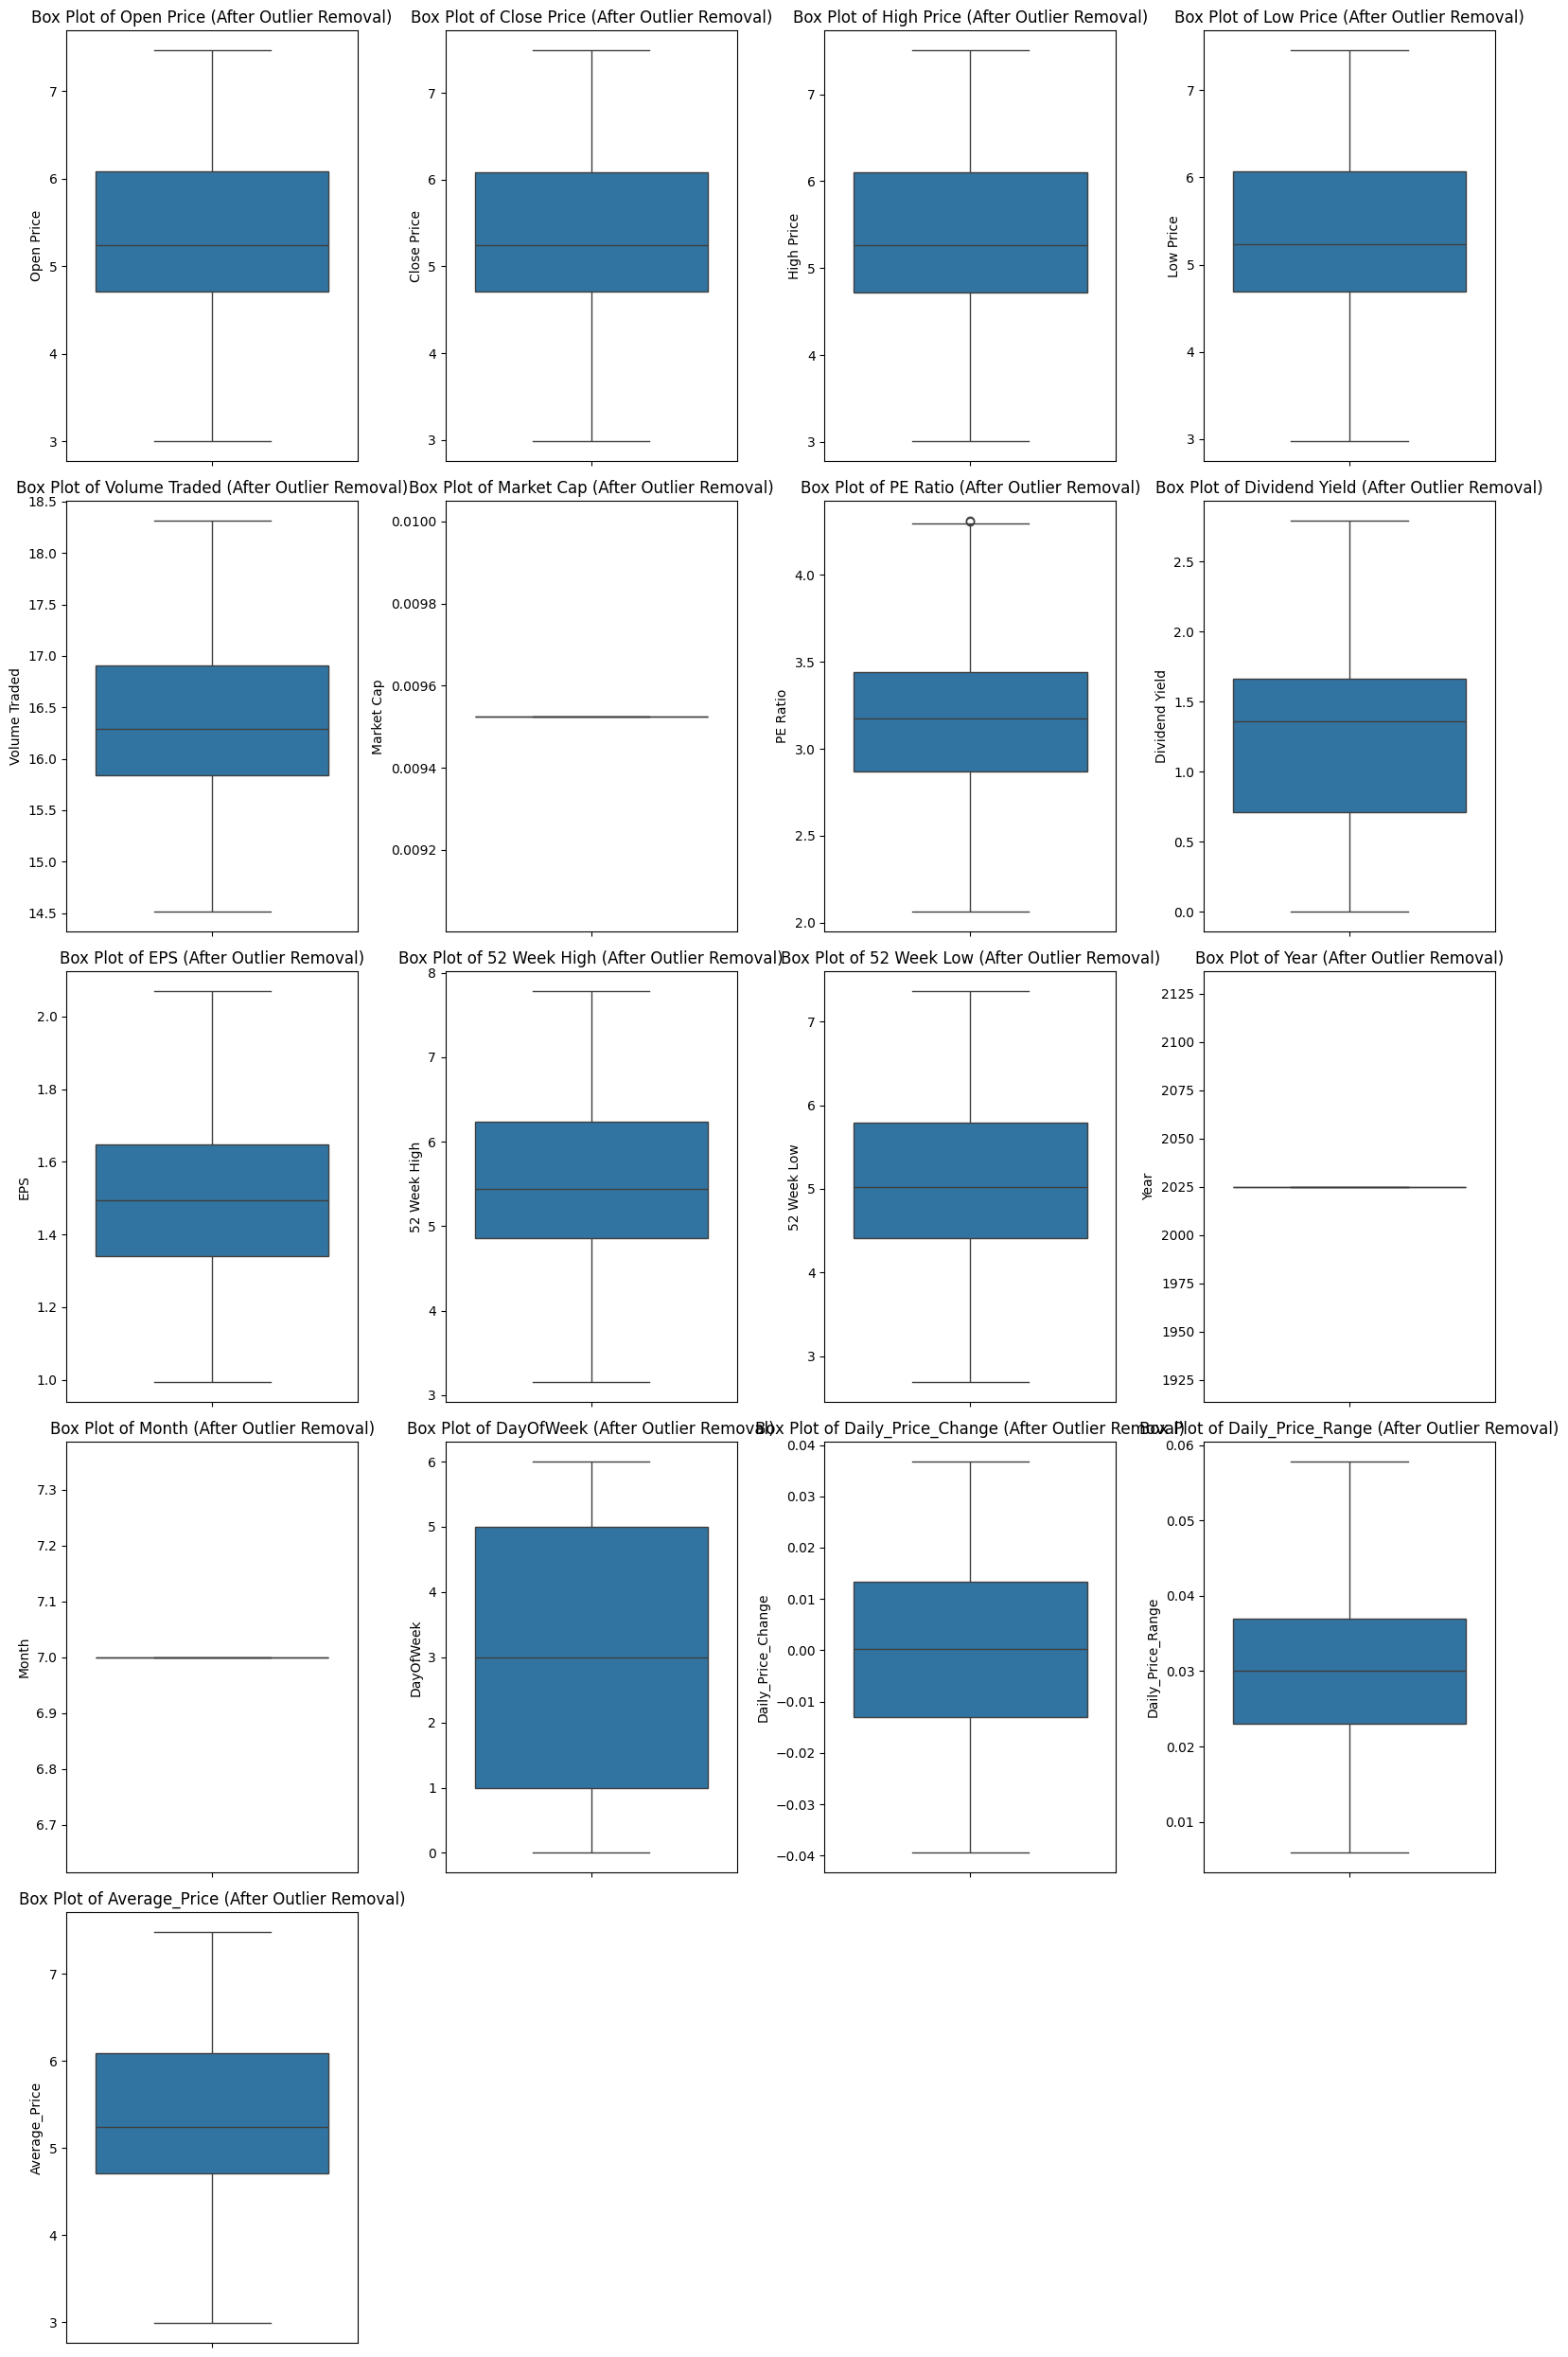

In [ ]:

numeric_cols_cleaned = df_cleaned.select_dtypes(include=np.number).columns

n_cols =
n_rows = (len(numeric_cols_cleaned) + n_cols - 1) // n_cols

plt.figure(figsize=(16, n_rows * 5))

# Plot boxplots
for i, col in enumerate(numeric_cols_cleaned):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Box Plot of {col} (After Outlier Removal)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,Date,Open Price,Close Price,High Price,Low Price,Volume Traded,Market Cap,PE Ratio,Dividend Yield,EPS,52 Week High,52 Week Low,Year,Month,DayOfWeek,Daily_Price_Change,Daily_Price_Range,Average_Price
count,2542,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2.542000e+03,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.0,2542.0,2542.000000,2542.000000,2542.000000,2542.000000
mean,2025-07-16 00:00:00,5.344151,5.344234,5.359333,5.328991,16.307083,9.525305e-03,3.183563,1.139860,1.509141,5.534940,5.105620,2025.0,7.0,2.903226,0.000084,0.030342,5.344177
min,2025-07-01 00:00:00,3.000222,2.980111,3.004196,2.972975,14.511408,9.525305e-03,2.061787,0.000000,0.992883,3.151453,2.683758,2025.0,7.0,0.000000,-0.039897,0.005877,2.989376
25%,2025-07-08 00:00:00,4.721152,4.720305,4.736527,4.706846,15.827447,9.525305e-03,2.873988,0.685565,1.344879,4.878512,4.436130,2025.0,7.0,1.000000,-0.013010,0.023168,4.722056
50%,2025-07-16 00:00:00,5.284294,5.277757,5.298492,5.265949,16.282590,9.525305e-03,3.179095,1.345362,1.500255,5.460925,5.044779,2025.0,7.0,3.000000,0.000355,0.030157,5.281792
75%,2025-07-24 00:00:00,6.111390,6.114782,6.128462,6.098333,16.892248,9.525305e-03,3.450226,1.658312,1.653347,6.289024,5.842181,2025.0,7.0,5.000000,0.013345,0.037079,6.113989
max,2025-07-31 00:00:00,8.254076,8.263902,8.275644,8.248351,18.314863,9.525305e-03,4.585478,2.792848,2.303581,8.543430,8.151195,2025.0,7.0,6.000000,0.036777,0.061113,8.258414
std,NaN,0.943340,0.943410,0.943569,0.942975,0.790683,5.656311e-16,0.428880,0.716936,0.236775,0.949289,0.945195,0.0,0.0,1.940698,0.015930,0.009810,0.943299
